In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from gvc_measures import *

In [2]:
# set random seed
np.random.seed(42)
# matplotlib font settings
plt.rcParams['font.family'] = ['serif']
# file path to save figures
filepath = "C:/Users/Dylan/Documents/King's College London/MSc Dissertation/Figures"

## Power Law Model

In [199]:
# Parameters
# number of countries
N = 500
a = 2.5
m = 1
aF = 1.5
mF = 100
# random input use matrix 
A = st.pareto.rvs(b=a, scale=m, size=(N,N))
# Random final demand vector 
F = st.pareto.rvs(b=aF, scale=mF, size=N)
# output vector
y = A.sum(axis=1) + F
# up/downstreamness
U = upstreamness(A, y)
D = downstreamness(A, y)
# rank-1 estimations 
U_rank1 = upstreamness_rank1(A, y)
D_rank1 = downstreamness_rank1(A, y)

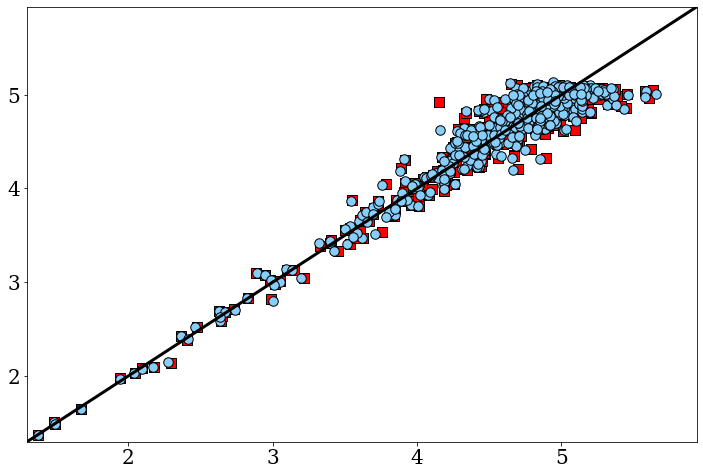

In [200]:
# correlation plot 
plt.figure(figsize=(12, 8))
# x & y limits
min_val = min(U.min(), D.min())*(1 - 0.05)
max_val = max(U.max(), D.max())*(1 + 0.05)
plt.ylim([min_val, max_val])
plt.xlim([min_val, max_val])
# straight line
x1 = np.linspace(min_val, max_val, 100)
x2 = np.linspace(min_val, max_val, 100)
plt.plot(x1, x2, color='k', linewidth=3)
# upstreamness & downstreamness rank-1 scatter plot
plt.scatter(D_rank1, U_rank1, color='red', marker='s', s=90, edgecolors='k')
# upstreamness & downstreamness scatter plot
plt.scatter(D, U, color='lightskyblue', s=90, edgecolors='k')
# tick sizes
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig(f'{filepath}/pl_corr.pdf')
plt.show()

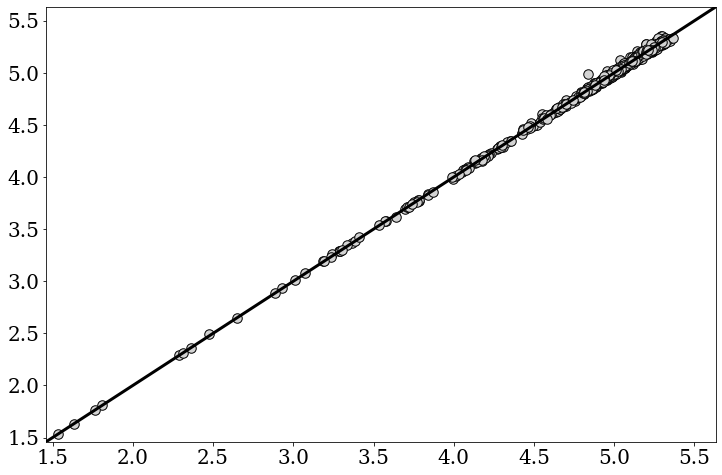

In [187]:
# upstreamness & rank 1 correlation plot
plt.figure(figsize=(12, 8))
# x & y limits
min_val = min(U.min(), U_rank1.min())*(1 - 0.05)
max_val = max(U.max(), U_rank1.max())*(1 + 0.05)
plt.ylim([min_val, max_val])
plt.xlim([min_val, max_val])
# straight line
x1 = np.linspace(min_val, max_val, 100)
x2 = np.linspace(min_val, max_val, 100)
plt.plot(x1, x2, color='k', linewidth=3)
# upstreamness & downstreamness scatter plot
plt.scatter(U, U_rank1, color='lightgrey', s=90, edgecolors='k')
# tick sizes
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig(f'{filepath}/up_rank1.pdf')
plt.show()

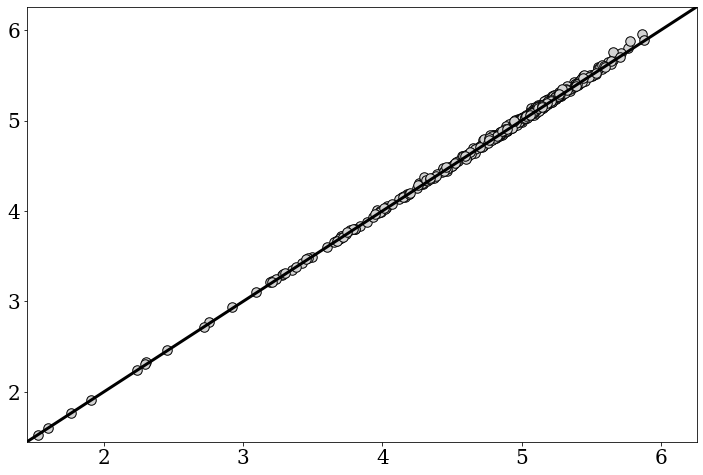

In [188]:
# downstreamness & rank 1 correlation plot
plt.figure(figsize=(12, 8))
# x & y limits
min_val = min(D.min(), D_rank1.min())*(1 - 0.05)
max_val = max(D.max(), D_rank1.max())*(1 + 0.05)
plt.ylim([min_val, max_val])
plt.xlim([min_val, max_val])
# straight line
x1 = np.linspace(min_val, max_val, 100)
x2 = np.linspace(min_val, max_val, 100)
plt.plot(x1, x2, color='k', linewidth=3)
# upstreamness & downstreamness scatter plot
plt.scatter(D, D_rank1, color='lightgrey', s=90, edgecolors='k')
# tick sizes
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig(f'{filepath}/down_rank1.pdf')
plt.show()

In [191]:
### Higher alpha parameter ###
# Parameters
N = 500
a = 10.5
m = 1
aF = 1.5
mF = 100
# random input use matrix 
A = st.pareto.rvs(b=a, scale=m, size=(N,N))
# Random final demand vector 
F = st.pareto.rvs(b=aF, scale=mF, size=N)
# output vector
y = A.sum(axis=1) + F
# up/downstreamness
U = upstreamness(A, y)
D = downstreamness(A, y)
# rank-1 estimations 
U_rank1 = upstreamness_rank1(A, y)
D_rank1 = downstreamness_rank1(A, y)

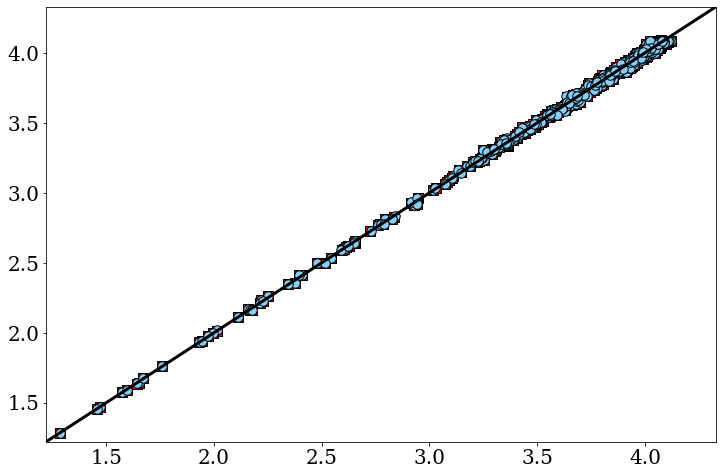

In [192]:
# correlation plot
plt.figure(figsize=(12, 8))
# x & y limits
min_val = min(U.min(), D.min())*(1 - 0.05)
max_val = max(U.max(), D.max())*(1 + 0.05)
plt.ylim([min_val, max_val])
plt.xlim([min_val, max_val])
# straight line
x1 = np.linspace(min_val, max_val, 100)
x2 = np.linspace(min_val, max_val, 100)
plt.plot(x1, x2, color='k', linewidth=3)
# upstreamness & downstreamness rank-1 scatter plot
plt.scatter(D_rank1, U_rank1, color='red', marker='s', s=90, edgecolors='k')
# upstreamness & downstreamness scatter plot
plt.scatter(D, U, color='lightskyblue', s=90, edgecolors='k')
# tick sizes
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig(f'{filepath}/pl_high_a_corr.pdf')
plt.show()

## Power Law & Sparsity Model

In [193]:
# Parameters
# number of countries
N = 500
a = 2.5
m = 1
aF = 1.5
mF = 100
# sparse matrix
p = 0.8
S = np.random.choice([0, 1], size=(N,N),p=[1-p,p])
# random input use matrix 
A = st.pareto.rvs(b=a, scale=m, size=(N,N))*S
# Random final demand vector 
F = st.pareto.rvs(b=aF, scale=mF, size=N)
# output vector
y = A.sum(axis=1) + F
# up/downstreamness
U = upstreamness(A, y)
D = downstreamness(A, y)
# rank-1 estimations
U_rank1 = upstreamness_rank1(A, y)
D_rank1 = downstreamness_rank1(A, y)

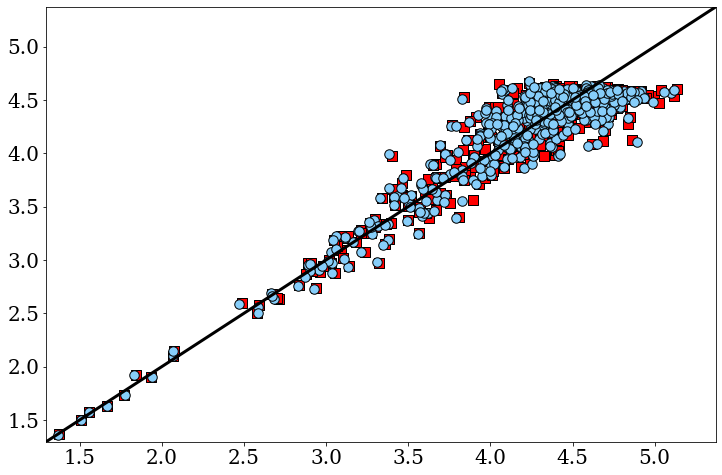

In [194]:
# correlation plot 
plt.figure(figsize=(12, 8))
# x & y limits
min_val = min(U.min(), D.min())*(1 - 0.05)
max_val = max(U.max(), D.max())*(1 + 0.05)
plt.ylim([min_val, max_val])
plt.xlim([min_val, max_val])
# straight line
x1 = np.linspace(min_val, max_val, 100)
x2 = np.linspace(min_val, max_val, 100)
plt.plot(x1, x2, color='k', linewidth=3)
# upstreamness & downstreamness rank-1 scatter plot
plt.scatter(D_rank1, U_rank1, color='red', marker='s', s=90, edgecolors='k')
# upstreamness & downstreamness scatter plot
plt.scatter(D, U, color='lightskyblue', s=90, edgecolors='k')
# tick sizes
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# tick sizes
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig(f'{filepath}/pl_low_sparsity_corr.pdf')
plt.show()

In [203]:
# Parameters
# number of countries
N = 500
a = 2.5
m = 1
aF = 1.5
mF = 100
# sparse matrix
p = 0.1
S = np.random.choice([0, 1], size=(N,N),p=[1-p,p])
# random input use matrix 
A = st.pareto.rvs(b=a, scale=m, size=(N,N))*S
# Random final demand vector 
F = st.pareto.rvs(b=aF, scale=mF, size=N)
# output vector
y = A.sum(axis=1) + F
# up/downstreamness
U = upstreamness(A, y)
D = downstreamness(A, y)
# rank-1 estimations
U_rank1 = upstreamness_rank1(A, y)
D_rank1 = downstreamness_rank1(A, y)

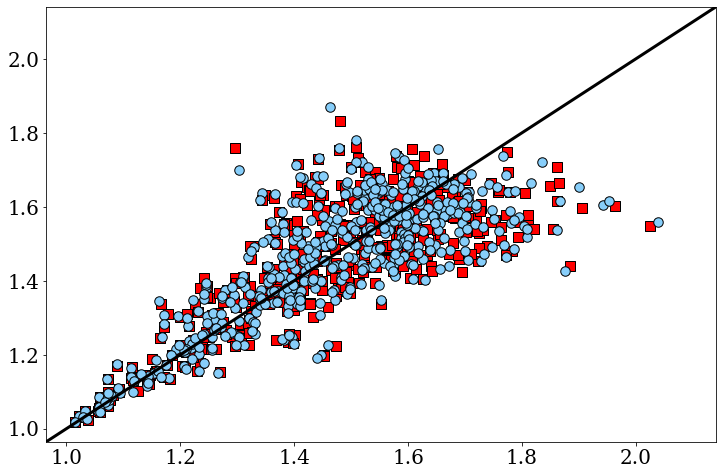

In [197]:
# correlation plot 
plt.figure(figsize=(12, 8))
# x & y limits
min_val = min(U.min(), D.min())*(1 - 0.05)
max_val = max(U.max(), D.max())*(1 + 0.05)
plt.ylim([min_val, max_val])
plt.xlim([min_val, max_val])
# straight line
x1 = np.linspace(min_val, max_val, 100)
x2 = np.linspace(min_val, max_val, 100)
plt.plot(x1, x2, color='k', linewidth=3)
# upstreamness & downstreamness rank-1 scatter plot
plt.scatter(D_rank1, U_rank1, color='red', marker='s', s=90, edgecolors='k')
# upstreamness & downstreamness scatter plot
plt.scatter(D, U, color='lightskyblue', s=90, edgecolors='k')
# tick sizes
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.savefig(f'{filepath}/pl_high_sparsity_corr.pdf')
plt.show()

## Block Model: Power Law

In [334]:
### Uniform parameters ###
# number of countries
M = 50
# number of industries
N = 50
# sparsity param: uniform
p_array = np.random.uniform(0.01, 0.99, size=(N,N))
# power-law params: uniform
a_array = np.random.uniform(1.6, 4.6, size=(N,N))
m_array = np.random.uniform(0.001, 1, size=(N,N))
aF_array = np.random.uniform(1.2, 3.2, size=N)
mF_array = np.random.uniform(100, 1000, size=N)
# empty DataFrame to store results
df_A = pd.DataFrame(np.zeros(shape=(N*M,N*M)))
multi_index = pd.MultiIndex.from_product([np.arange(N), np.arange(M)], names=('country', 'industry'))
df_A.columns = multi_index
df_A.index = multi_index
# final demand
df_F = pd.DataFrame(np.zeros(shape=N*M))
multi_index = pd.MultiIndex.from_product([np.arange(N), np.arange(M)], names=('country', 'industry'))
df_F.columns = ['Final Demand']
df_F.index = multi_index

# random blocks
for i in range(N):
    aF = aF_array[i]
    mF = mF_array[i]
    F = st.pareto.rvs(b=aF, scale=mF, size=M).reshape(M,1)
    df_F.loc[i] = F
    for j in range(N):
        p = p_array[i,j]
        a = a_array[i,j]
        m = m_array[i,j]
        S = np.random.choice([0, 1], size=(M,M),p=[1-p,p])
        A = st.pareto.rvs(b=a, scale=m, size=(M,M))*S
        # insert block
        df_A.loc[i,[j]] = A

In [335]:
# ouptut vector
A = df_A.to_numpy()
F = df_F.to_numpy().reshape(N*M)
y = A.sum(axis=1) + F
# up/downstreamness
U = upstreamness(A, y)
D = downstreamness(A, y)

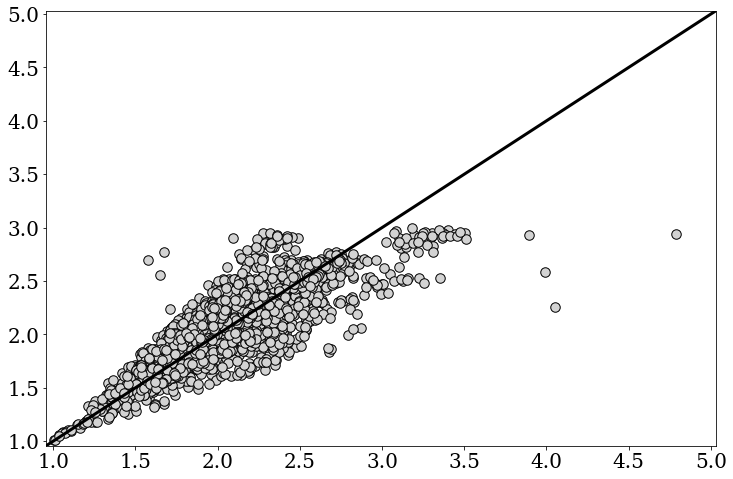

In [336]:
# correlation plot
plt.figure(figsize=(12, 8))
# x & y limits
min_val = min(U.min(), D.min())*(1 - 0.05)
max_val = max(U.max(), D.max())*(1 + 0.05)
plt.ylim([min_val, max_val])
plt.xlim([min_val, max_val])
# straight line
x1 = np.linspace(min_val, max_val, 100)
x2 = np.linspace(min_val, max_val, 100)
plt.plot(x1, x2, color='k', linewidth=3)
# upstreamness & downstreamness scatter plot
plt.scatter(D, U, color='lightgrey', s=90, edgecolors='k')
# tick sizes
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig(f'{filepath}/pl_block_industry_corr.pdf')
plt.show()

In [337]:
# country data
# input matrix
df_Ac = df_A.groupby(by=['country']).sum()
df_Ac = df_Ac.T.groupby(by=['country']).sum()
df_Ac = df_Ac.T
# final demand
df_Fc = (df_F.groupby(by=['country']).sum()).sum(axis=1)
# output
df_yc = df_Ac.sum(axis=1) + df_Fc

In [338]:
# up/downstreamness
Ac = df_Ac.to_numpy()
yc = df_yc.to_numpy()
Uc = upstreamness(Ac, yc)
Dc = downstreamness(Ac, yc)

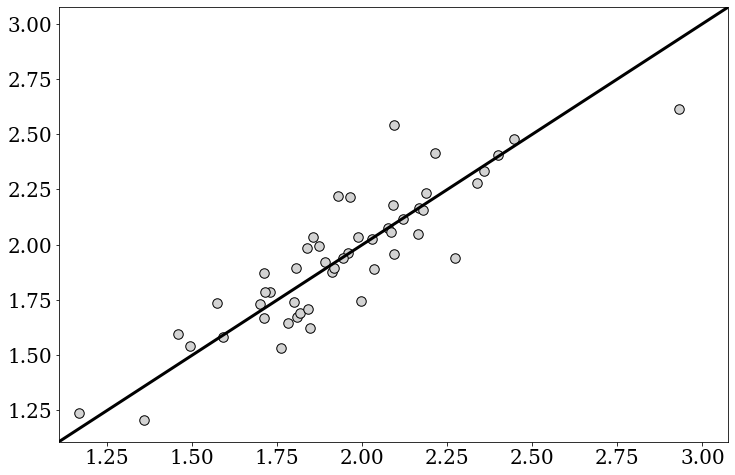

In [339]:
# correlation plot
plt.figure(figsize=(12, 8))
# x & y limits
min_val = min(Uc.min(), Dc.min())*(1 - 0.05)
max_val = max(Uc.max(), Dc.max())*(1 + 0.05)
plt.ylim([min_val, max_val])
plt.xlim([min_val, max_val])
# straight line
x1 = np.linspace(min_val, max_val, 100)
x2 = np.linspace(min_val, max_val, 100)
plt.plot(x1, x2, color='k', linewidth=3)
# upstreamness & downstreamness scatter plot
plt.scatter(Dc, Uc, color='lightgrey', s=90, edgecolors='k')
# tick sizes
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig(f'{filepath}/pl_block_country_corr.pdf')
plt.show()

In [340]:
industry_results = st.pearsonr(U,D)
country_results = st.pearsonr(Uc,Dc)
print(f"industry results = {industry_results}")
print(f"country results = {country_results}")

industry results = PearsonRResult(statistic=0.8123796475621838, pvalue=0.0)
country results = PearsonRResult(statistic=0.8775507374256101, pvalue=6.171302417052372e-17)


In [ ]:
### Uniform parameters ###
# number of countries
M = 50
# number of industries
N = 50
# sparsity param: uniform
p_array = np.random.uniform(0.01, 0.99, size=(N,N))
# power-law params: uniform
a_array = np.random.uniform(1.6, 4.6, size=(N,N))
m_array = np.random.uniform(0.001, 1, size=(N,N))
aF_array = np.random.uniform(1.2, 3.2, size=N)
mF_array = np.random.uniform(100, 1000, size=N)
# empty DataFrame to store results
df_A = pd.DataFrame(np.zeros(shape=(N*M,N*M)))
multi_index = pd.MultiIndex.from_product([np.arange(N), np.arange(M)], names=('country', 'industry'))
df_A.columns = multi_index
df_A.index = multi_index
# final demand
df_F = pd.DataFrame(np.zeros(shape=N*M))
multi_index = pd.MultiIndex.from_product([np.arange(N), np.arange(M)], names=('country', 'industry'))
df_F.columns = ['Final Demand']
df_F.index = multi_index

# random blocks
for i in range(N):
    aF = aF_array[i]
    mF = mF_array[i]
    F = st.pareto.rvs(b=aF, scale=mF, size=M).reshape(M,1)
    df_F.loc[i] = F
    for j in range(N):
        p = p_array[i,j]
        a = a_array[i,j]
        m = m_array[i,j]
        S = np.random.choice([0, 1], size=(M,M),p=[1-p,p])
        A = st.pareto.rvs(b=a, scale=m, size=(M,M))*S
        # insert block
        df_A.loc[i,[j]] = A